In [1]:
# numpy für vordefinierte Formeln wie pow, sin, exp, etc.
import numpy as np

# pyplot für's Plotten
import matplotlib.pyplot as plt

# scipy's optimize für's Fitten
from scipy import optimize

## 1 b)

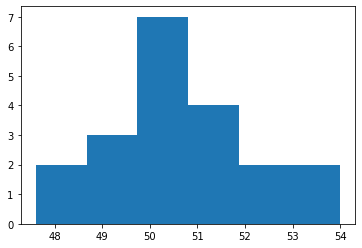

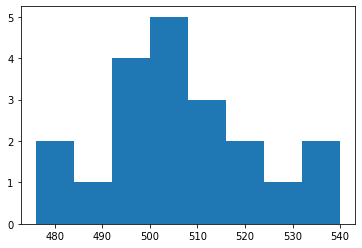

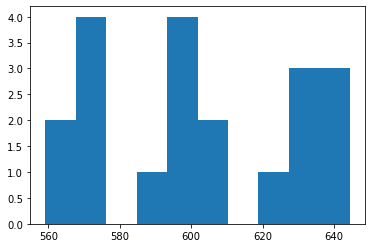

In [20]:
geschwindigkeiten = np.loadtxt('1b1.txt', dtype=float, delimiter=',')
energien = np.loadtxt('1b2.txt', dtype=float, delimiter=',')
temperaturen = np.loadtxt('1b3.txt', dtype=float, delimiter=',')

plt.figure()
plt.hist(geschwindigkeiten, bins=6)

plt.figure()
plt.hist(energien, bins=8)

plt.figure()
plt.hist(temperaturen, bins=10)

plt.show()

## 1.3

In [3]:
# Eines von beiden plotten

xarr = np.loadtxt('1_3.txt', dtype=float, usecols=0, delimiter=',')
yarr = np.loadtxt('1_3.txt', dtype=float, usecols=1, delimiter=',')

# xarr = np.loadtxt('1_3.txt', dtype=float, usecols=2, delimiter=',')
# yarr = np.loadtxt('1_3.txt', dtype=float, usecols=3, delimiter=',')

In [4]:
# Definieren der Fit-Funktion
def fit_func(x, m, b):
    return m * x + b

In [5]:
# Aufruf der Fittenden-Funktion von optimize
params, params_covariance = optimize.curve_fit(fit_func, xarr, yarr)

# Die Ergebnisse des Fits printen
for i in range(0, len(params)):
    print(str(params[i]) + " +- " + str(np.sqrt(params_covariance[i][i])))

-0.04261904762132196 +- 0.002237757691296307
4.690452380960431 +- 0.006666489549142153


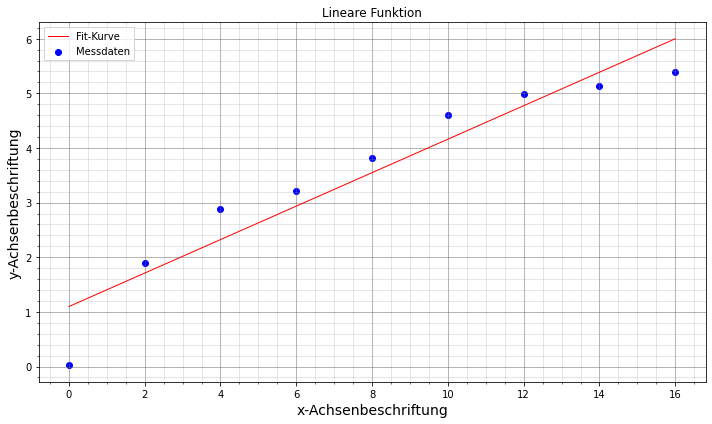

In [21]:
# figure object erzeugen
plt.figure(figsize=(10,6))

# gridlines erzeugen (wie man sieht, gibt es zig Möglichkeiten diese zu Zeichnen)
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)

# Achsenbeschriftungen
plt.xlabel("x-Achsenbeschriftung", fontsize="14")
plt.ylabel("y-Achsenbeschriftung", fontsize="14")

# Titel für den Plot
plt.title("Lineare Funktion")

# Für einen ordentlichen Funktionsplot erzeugen wir ein Array,
# das die selben Grenzen wie die eingelesenen Messdaten hat,
# aber mehr Datenpunkte besitzt (sonst wird's eckig)
xlo = xarr[0]
xhi = xarr[-1]
xplot = np.linspace(xlo, xhi, int(1E5))

# Messdaten plotten
# plt.errorbar(xarr, yarr, yerror, fmt='x', color="blue", linewidth=1, ecolor="blue", capsize=3, label="Messdaten")
plt.scatter(xarr, yarr, color="blue", label="Messdaten")
# Fit-Kurve plotten
plt.plot(xplot, fit_func(xplot, *params), color='red', linewidth=1, label="Fit-Kurve")

# Darstellung der Legende
plt.legend(fancybox=False, loc="best")

# plt.yscale('log')

# Bild zuschneiden, abspeichern
plt.tight_layout()
plt.savefig("LineareFunktion.pdf")
plt.show()

## 1.4

### Erste Möglichkeit (Exponentialfunktion fitten)

In [7]:
xarr = np.loadtxt('1_4.txt', dtype=float, usecols=0, delimiter=',')
yarr = np.loadtxt('1_4.txt', dtype=float, usecols=1, delimiter=',')

In [8]:
# Definieren der Fit-Funktion
def fit_func(t, N_0, l):
    return N_0 * np.exp(-l*t)

In [9]:
# Aufruf der Fittenden-Funktion von optimize
params, params_covariance = optimize.curve_fit(fit_func, xarr, yarr)

# Die Ergebnisse des Fits printen
for i in range(0, len(params)):
    print(str(params[i]) + " +- " + str(np.sqrt(params_covariance[i][i])))

1002.5943735073308 +- 20.892293307147003
0.504341957167515 +- 0.013706334963356387


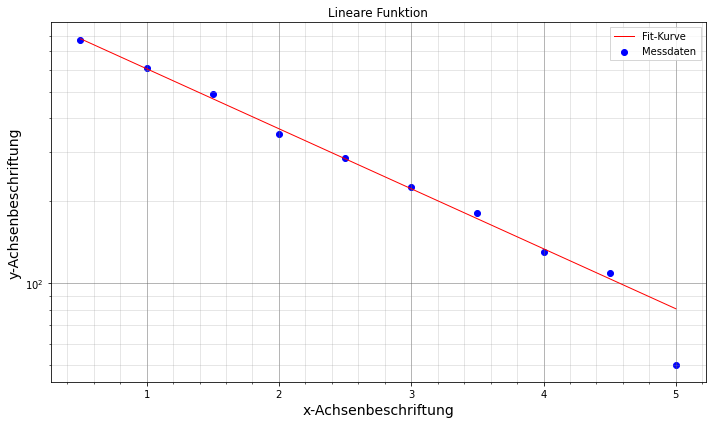

In [10]:
# figure object erzeugen
plt.figure(figsize=(10,6))

# gridlines erzeugen (wie man sieht, gibt es zig Möglichkeiten diese zu Zeichnen)
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)

# Achsenbeschriftungen
plt.xlabel("x-Achsenbeschriftung", fontsize="14")
plt.ylabel("y-Achsenbeschriftung", fontsize="14")

# Titel für den Plot
plt.title("Lineare Funktion")

# Für einen ordentlichen Funktionsplot erzeugen wir ein Array,
# das die selben Grenzen wie die eingelesenen Messdaten hat,
# aber mehr Datenpunkte besitzt (sonst wird's eckig)
xlo = xarr[0]
xhi = xarr[len(xarr)-1]
xplot = np.linspace(xlo, xhi, int(1E5))

# Messdaten plotten
# plt.errorbar(xarr, yarr, yerror, fmt='x', color="blue", linewidth=1, ecolor="blue", capsize=3, label="Messdaten")
plt.scatter(xarr, yarr, color="blue", label="Messdaten")
# Fit-Kurve plotten
plt.plot(xplot, fit_func(xplot, *params), color='red', linewidth=1, label="Fit-Kurve")

# Darstellung der Legende
plt.legend(fancybox=False, loc="best")

plt.yscale('log')

# Bild zuschneiden, abspeichern
plt.tight_layout()
plt.savefig("LineareFunktion.pdf")
plt.show()

### Zweite Möglichkeit (Lineare Funktion an logarithmierte Daten fitten)

In [11]:
xarr = np.loadtxt('1_4.txt', dtype=float, usecols=0, delimiter=',')
yarr = np.loadtxt('1_4.txt', dtype=float, usecols=1, delimiter=',')

yarr = np.log(yarr)

In [12]:
# Definieren der Fit-Funktion
def fit_func(t, a, l):
    return a + l*t

In [13]:
# Aufruf der Fittenden-Funktion von optimize
params, params_covariance = optimize.curve_fit(fit_func, xarr, yarr)

# Die Ergebnisse des Fits printen
for i in range(0, len(params)):
    print(str(params[i]) + " +- " + str(np.sqrt(params_covariance[i][i])))
    
print('N0 = ', np.exp(params[0]))

7.003263023705097 +- 0.10102094107570782
-0.5521003703868068 +- 0.03256199766808755
N0 =  1100.2173428794558


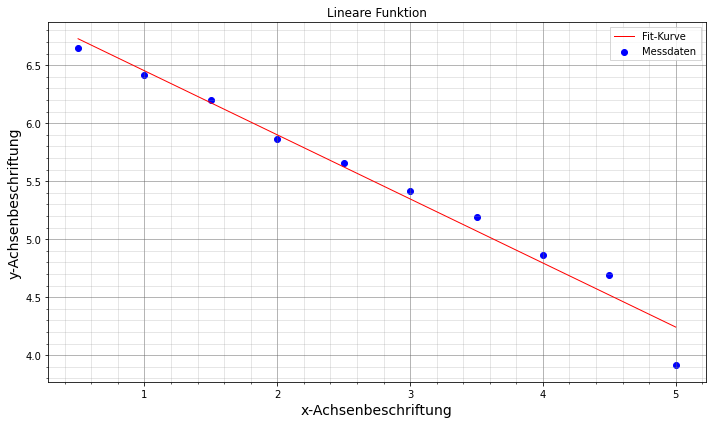

In [14]:
# figure object erzeugen
plt.figure(figsize=(10,6))

# gridlines erzeugen (wie man sieht, gibt es zig Möglichkeiten diese zu Zeichnen)
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)

# Achsenbeschriftungen
plt.xlabel("x-Achsenbeschriftung", fontsize="14")
plt.ylabel("y-Achsenbeschriftung", fontsize="14")

# Titel für den Plot
plt.title("Lineare Funktion")

# Für einen ordentlichen Funktionsplot erzeugen wir ein Array,
# das die selben Grenzen wie die eingelesenen Messdaten hat,
# aber mehr Datenpunkte besitzt (sonst wird's eckig)
xlo = xarr[0]
xhi = xarr[len(xarr)-1]
xplot = np.linspace(xlo, xhi, int(1E5))

# Messdaten plotten
# plt.errorbar(xarr, yarr, yerror, fmt='x', color="blue", linewidth=1, ecolor="blue", capsize=3, label="Messdaten")
plt.scatter(xarr, yarr, color="blue", label="Messdaten")
# Fit-Kurve plotten
plt.plot(xplot, fit_func(xplot, *params), color='red', linewidth=1, label="Fit-Kurve")

# Darstellung der Legende
plt.legend(fancybox=False, loc="best")

# Bild zuschneiden, abspeichern
plt.tight_layout()
plt.savefig("LineareFunktion.pdf")
plt.show()

## 1.5

In [15]:
xarr = np.loadtxt('1_5.txt', dtype=float, usecols=0, delimiter=',')
yarr = np.loadtxt('1_5.txt', dtype=float, usecols=1, delimiter=',')

In [16]:
# Definieren der Fit-Funktion
def fit_func(t, m, b):
    return m * t + b

# Alternative
# def fit_func(t, a, b, c):
#     return a*(t + c)**2 + b

In [17]:
# Aufruf der Fittenden-Funktion von optimize
params, params_covariance = optimize.curve_fit(fit_func, xarr, yarr)

# Die Ergebnisse des Fits printen
for i in range(0, len(params)):
    print(str(params[i]) + " +- " + str(np.sqrt(params_covariance[i][i])))

0.30633333333182045 +- 0.037310332182520965
1.098222222222436 +- 0.3552654191449268


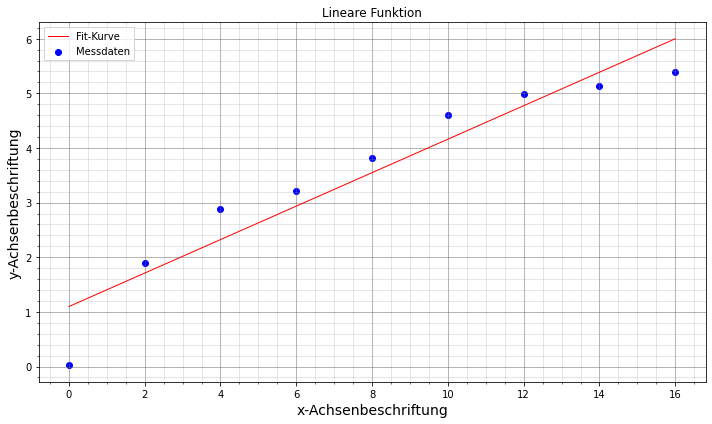

In [18]:
# figure object erzeugen
plt.figure(figsize=(10,6))

# gridlines erzeugen (wie man sieht, gibt es zig Möglichkeiten diese zu Zeichnen)
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)

# Achsenbeschriftungen
plt.xlabel("x-Achsenbeschriftung", fontsize="14")
plt.ylabel("y-Achsenbeschriftung", fontsize="14")

# Titel für den Plot
plt.title("Lineare Funktion")

# Für einen ordentlichen Funktionsplot erzeugen wir ein Array,
# das die selben Grenzen wie die eingelesenen Messdaten hat,
# aber mehr Datenpunkte besitzt (sonst wird's eckig)
xlo = xarr[0]
xhi = xarr[len(xarr)-1]
xplot = np.linspace(xlo, xhi, int(1E5))

# Messdaten plotten
# plt.errorbar(xarr, yarr, yerror, fmt='x', color="blue", linewidth=1, ecolor="blue", capsize=3, label="Messdaten")
plt.scatter(xarr, yarr, color="blue", label="Messdaten")
# Fit-Kurve plotten
plt.plot(xplot, fit_func(xplot, *params), color='red', linewidth=1, label="Fit-Kurve")

# Darstellung der Legende
plt.legend(fancybox=False, loc="best")

# plt.yscale('log')

# Bild zuschneiden, abspeichern
plt.tight_layout()
plt.savefig("LineareFunktion.pdf")
plt.show()